Preprocessing the So2Sat Data

In [4]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

train_ds, test_ds = tfds.load('so2sat', split=['train', 'validation'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/so2sat/rgb/2.1.0.incompleteZUN93E/so2sat-train.tfrecord*...:   0%|          | …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling ~/tensorflow_datasets/so2sat/rgb/2.1.0.incompleteZUN93E/so2sat-validation.tfrecord*...:   0%|       …

Dataset so2sat downloaded and prepared to ~/tensorflow_datasets/so2sat/rgb/2.1.0. Subsequent calls will reuse this data.


0
255


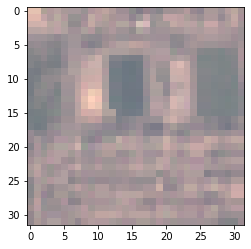

1
78


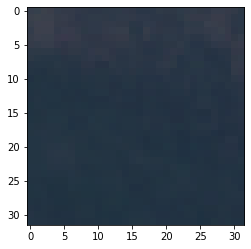

2
147


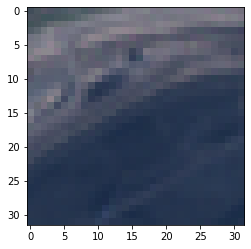

3
93


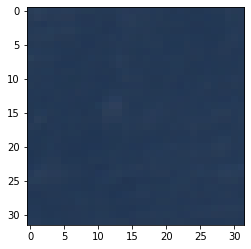

4
255


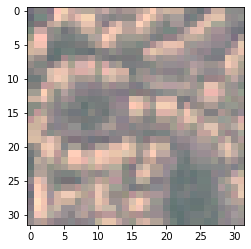

5
255


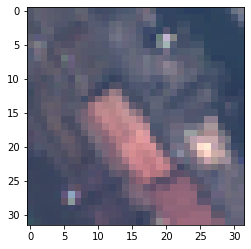

6
211


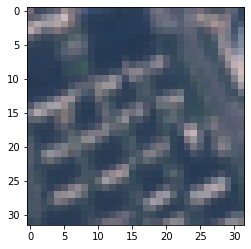

7
66


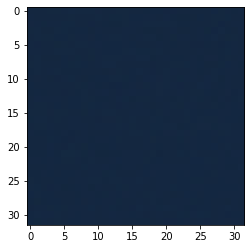

8
255


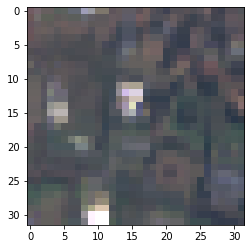

9
129


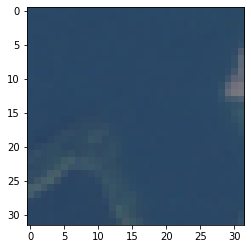

In [ ]:
images = []
for i, example in enumerate(train_ds.take(10)):
    image, label = example["image"], example["label"]
    print(i)
    print(image.numpy().max())
    images.append(image)
    plt.imshow(image.numpy())
    plt.show()

In [ ]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [ ]:
list_train_ds = list(train_ds)

In [ ]:
type(list_train_ds[0]['image'])

tensorflow.python.framework.ops.EagerTensor

In [ ]:
print(train_ds)

<PrefetchDataset element_spec={'image': TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'sample_id': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


The lines of code below stores the data in CSV format with image containing 3 dimensional tensors of RGB data and label containing one dimensional tensor.

In [5]:
import pandas as pd
df=pd.DataFrame(train_ds, columns=['image', 'label','sample_id'])

In [ ]:
df.head(10)

,image,label,sample_id
0,"(((tf.Tensor(229, shape=(), dtype=uint8), tf.T...","tf.Tensor(1, shape=(), dtype=int64)","tf.Tensor(16399, shape=(), dtype=int64)"
1,"(((tf.Tensor(54, shape=(), dtype=uint8), tf.Te...","tf.Tensor(12, shape=(), dtype=int64)","tf.Tensor(206287, shape=(), dtype=int64)"
2,"(((tf.Tensor(65, shape=(), dtype=uint8), tf.Te...","tf.Tensor(9, shape=(), dtype=int64)","tf.Tensor(160184, shape=(), dtype=int64)"
3,"(((tf.Tensor(41, shape=(), dtype=uint8), tf.Te...","tf.Tensor(16, shape=(), dtype=int64)","tf.Tensor(173436, shape=(), dtype=int64)"
4,"(((tf.Tensor(118, shape=(), dtype=uint8), tf.T...","tf.Tensor(1, shape=(), dtype=int64)","tf.Tensor(320753, shape=(), dtype=int64)"
5,"(((tf.Tensor(83, shape=(), dtype=uint8), tf.Te...","tf.Tensor(9, shape=(), dtype=int64)","tf.Tensor(1680, shape=(), dtype=int64)"
6,"(((tf.Tensor(120, shape=(), dtype=uint8), tf.T...","tf.Tensor(3, shape=(), dtype=int64)","tf.Tensor(201893, shape=(), dtype=int64)"
7,"(((tf.Tensor(20, shape=(), dtype=uint8), tf.Te...","tf.Tensor(16, shape=(), dtype=int64)","tf.Tensor(331808, shape=(), dtype=int64)"
8,"(((tf.Tensor(114, shape=(), dtype=uint8), tf.T...","tf.Tensor(8, shape=(), dtype=int64)","tf.Tensor(180096, shape=(), dtype=int64)"
9,"(((tf.Tensor(42, shape=(), dtype=uint8), tf.Te...","tf.Tensor(16, shape=(), dtype=int64)","tf.Tensor(103740, shape=(), dtype=int64)"


In [6]:
df=df[['image','label']]
df.head(5)

,image,label
0,"(((tf.Tensor(229, shape=(), dtype=uint8), tf.T...","tf.Tensor(1, shape=(), dtype=int64)"
1,"(((tf.Tensor(54, shape=(), dtype=uint8), tf.Te...","tf.Tensor(12, shape=(), dtype=int64)"
2,"(((tf.Tensor(65, shape=(), dtype=uint8), tf.Te...","tf.Tensor(9, shape=(), dtype=int64)"
3,"(((tf.Tensor(41, shape=(), dtype=uint8), tf.Te...","tf.Tensor(16, shape=(), dtype=int64)"
4,"(((tf.Tensor(118, shape=(), dtype=uint8), tf.T...","tf.Tensor(1, shape=(), dtype=int64)"


In [ ]:
df.to_csv('Users\kathakolisengupta\Documents\file.csv')

In [ ]:
#[(train_features, label_batch,sampleid_batch)] = train_ds.take(1)
example,= train_ds.take(1)
print(example['image'])

tf.Tensor(
[[[229 194 177]
  [229 194 177]
  [174 161 149]
  ...
  [181 158 158]
  [187 168 158]
  [165 149 150]]

 [[225 184 173]
  [225 184 173]
  [194 164 166]
  ...
  [170 153 154]
  [194 169 164]
  [168 145 153]]

 [[207 177 171]
  [207 177 171]
  [211 178 174]
  ...
  [174 158 154]
  [192 163 162]
  [163 150 152]]

 ...

 [[161 144 144]
  [183 157 162]
  [149 146 146]
  ...
  [169 152 154]
  [182 155 161]
  [182 155 161]]

 [[148 135 141]
  [170 159 155]
  [162 142 149]
  ...
  [151 142 145]
  [156 144 147]
  [156 144 147]]

 [[145 135 140]
  [170 153 150]
  [159 144 149]
  ...
  [131 132 135]
  [131 132 135]
  [155 139 145]]], shape=(32, 32, 3), dtype=uint8)


VGG16 framework

In [2]:
'''VGG11/13/16/19 in Pytorch.'''
import torch
import torch.nn as nn


cfg = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


class VGG(nn.Module):
    def __init__(self, vgg_name, num_classes, fc_size=512):
        super(VGG, self).__init__()
        self.features = self._make_layers(cfg[vgg_name])
        self.classifier = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(512, 512),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(512, num_classes),
        )
        self._initialize_weights()

    def forward(self, x):
        out = self.features(x)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return out

    def intermediate_forward(self, x):
        outputs = []
        for l in list(self.features.modules())[1:]:
            x = l(x)
            if type(l) == nn.Conv2d:
                outputs.append(x.clone())
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        outputs.append(x.clone())
        return outputs

    def get_inter_outputs(self, x):
        outputs = []
        for l in list(self.features.modules())[1:]:
            x = l(x)
            if type(l) == nn.Conv2d:
                outputs.append(x.cpu().numpy())
            # outputs.append(x.cpu().numpy())
        x = x.view(x.size(0), -1)
        # for l in list(self.classifier.modules())[1:]:
        #     x = l(x)
            # if type(l) == nn.Conv2d or type(l) == nn.MaxPool2d:
            #     outputs.append(x.cpu().numpy())
            # outputs.append(x.cpu().numpy())
        x = self.classifier(x)
        outputs.append(x.cpu().numpy())
        return outputs

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def _make_layers(self, cfg):
        layers = []
        in_channels = 3
        for x in cfg:
            if x == 'M':
                layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
            else:
                layers += [nn.Conv2d(in_channels, x, kernel_size=3, padding=1),
                           nn.BatchNorm2d(x),
                           nn.ReLU(inplace=True)]
                in_channels = x
        layers += [nn.AvgPool2d(kernel_size=1, stride=1)]
        return nn.Sequential(*layers)

def vgg16():
    return VGG('VGG16', 10)

def vgg16_cifar100():
    return VGG('VGG16', 100)

def vgg16_so2sat():
    return VGG('VGG16', 17)

def test():
    net = VGG('VGG16', 10)
    x = torch.randn(2,3,32,32)
    y = net(x)
    print(y.size())

# test()

ResNet34_So2sat Framework

In [ ]:
'''ResNet in PyTorch.
For Pre-activation ResNet, see 'preact_resnet.py'.
Reference:
[1] Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun
    Deep Residual Learning for Image Recognition. arXiv:1512.03385
'''
import os

import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

    def intermediate_forward(self, x):
        outputs = []

        out = self.conv1(x)
        outputs.append(out.clone())
        out = self.bn1(out)
        # outputs.append(out.cpu().numpy())
        out = F.relu(out)
        # outputs.append(out.cpu().numpy())

        out = self.conv2(out)
        outputs.append(out.clone())
        out = self.bn2(out)
        # outputs.append(out.cpu().numpy())
        out += self.shortcut(x)
        out = F.relu(out)
        # outputs.append(out.cpu().numpy())

        return out, outputs


    def get_inter_outputs(self, x):
        outputs = []

        out = self.conv1(x)
        outputs.append(out.cpu().numpy())
        out = self.bn1(out)
        # outputs.append(out.cpu().numpy())
        out = F.relu(out)
        # outputs.append(out.cpu().numpy())

        out = self.conv2(out)
        outputs.append(out.cpu().numpy())
        out = self.bn2(out)
        # outputs.append(out.cpu().numpy())
        out += self.shortcut(x)
        out = F.relu(out)
        # outputs.append(out.cpu().numpy())

        return out, outputs


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

    def intermediate_forward(self, x):
        outputs = []

        x = self.conv1(x)
        outputs.append(x.clone())
        x = self.bn1(x)
        # outputs.append(x.cpu().numpy())
        x = F.relu(x)
        # outputs.append(x.cpu().numpy())

        for l in list(self.layer1.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.intermediate_forward(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer2.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.intermediate_forward(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer3.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.intermediate_forward(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer4.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.intermediate_forward(x)
                for out in previous_outputs:
                    outputs.append(out)

        x = F.avg_pool2d(x, 4)
        # outputs.append(x.cpu().numpy())
        x = x.view(x.size(0), -1)
        x = self.linear(x)

        outputs.append(x.clone())
        return outputs

    def get_inter_outputs(self, x):
        outputs = []

        x = self.conv1(x)
        outputs.append(x.cpu().numpy())
        x = self.bn1(x)
        # outputs.append(x.cpu().numpy())
        x = F.relu(x)
        # outputs.append(x.cpu().numpy())

        for l in list(self.layer1.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.get_inter_outputs(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer2.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.get_inter_outputs(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer3.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.get_inter_outputs(x)
                for out in previous_outputs:
                    outputs.append(out)

        for l in list(self.layer4.modules())[1:]:
            if type(l) == BasicBlock:
                x, previous_outputs = l.get_inter_outputs(x)
                for out in previous_outputs:
                    outputs.append(out)

        x = F.avg_pool2d(x, 4)
        # outputs.append(x.cpu().numpy())
        x = x.view(x.size(0), -1)
        x = self.linear(x)

        outputs.append(x.cpu().numpy())
        return outputs


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet34_cifar100():
    return ResNet(BasicBlock, [3, 4, 6, 3], 100)

def ResNet34_so2sat():
    return ResNet(BasicBlock, [3, 4, 6, 3], 17)


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet34_cifar100().cuda()
    # summary(net, (3, 32, 32))

    net.eval()
    with torch.no_grad():
        x = torch.randn(2, 3, 32, 32).cuda()
        out, outputs = net.get_inter_outputs(x)
        out2 = net(x)
    print()

# os.environ["CUDA_VISIBLE_DEVICES"] = "3"
# test()


DenseNet100 Framework

In [ ]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(BasicBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, training=self.training)
        return torch.cat([x, out], 1)


class BottleneckBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(BottleneckBlock, self).__init__()
        inter_planes = out_planes * 4
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, inter_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.bn2 = nn.BatchNorm2d(inter_planes)
        self.conv2 = nn.Conv2d(inter_planes, out_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.droprate = dropRate

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        out = self.conv2(self.relu(self.bn2(out)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return torch.cat([x, out], 1)

    def get_inter_outputs(self, x):
        outputs = []
        out = self.conv1(self.relu(self.bn1(x)))
        outputs.append(out.cpu().numpy())
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        out = self.conv2(self.relu(self.bn2(out)))
        outputs.append(out.cpu().numpy())
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return torch.cat([x, out], 1), outputs


class TransitionBlock(nn.Module):
    def __init__(self, in_planes, out_planes, dropRate=0.0):
        super(TransitionBlock, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=1,
                               padding=0, bias=False)
        self.droprate = dropRate

    def forward(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return F.avg_pool2d(out, 2)

    def get_inter_outputs(self, x):
        out = self.conv1(self.relu(self.bn1(x)))
        outputs = [out.cpu().numpy()]
        if self.droprate > 0:
            out = F.dropout(out, p=self.droprate, inplace=False, training=self.training)
        return F.avg_pool2d(out, 2), outputs


class DenseBlock(nn.Module):
    def __init__(self, nb_layers, in_planes, growth_rate, block, dropRate=0.0):
        super(DenseBlock, self).__init__()
        self.layer = self._make_layer(block, in_planes, growth_rate, nb_layers, dropRate)

    def _make_layer(self, block, in_planes, growth_rate, nb_layers, dropRate):
        layers = []
        for i in range(int(nb_layers)):
            layers.append(block(in_planes + i * growth_rate, growth_rate, dropRate))
        return nn.Sequential(*layers)

    def forward(self, x):
        return self.layer(x)

    def get_inter_outputs(self, x):
        outputs = []
        for l in list(self.layer.modules())[1:]:
            if type(l) == BottleneckBlock:
                x, previous_outputs = l.get_inter_outputs(x)
                for out in previous_outputs:
                    outputs.append(out)
        return x, outputs


class DenseNet(nn.Module):
    def __init__(self, depth, num_classes, growth_rate=12,
                 reduction=0.5, bottleneck=True, dropRate=0.0):
        super(DenseNet, self).__init__()
        in_planes = 2 * growth_rate
        n = (depth - 4) / 3
        if bottleneck == True:
            n = n / 2
            block = BottleneckBlock
        else:
            block = BasicBlock
        # 1st conv before any dense block
        self.conv1 = nn.Conv2d(3, in_planes, kernel_size=3, stride=1,
                               padding=1, bias=False)
        # 1st block
        self.block1 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes + n * growth_rate)
        self.trans1 = TransitionBlock(in_planes, int(math.floor(in_planes * reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes * reduction))
        # 2nd block
        self.block2 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes + n * growth_rate)
        self.trans2 = TransitionBlock(in_planes, int(math.floor(in_planes * reduction)), dropRate=dropRate)
        in_planes = int(math.floor(in_planes * reduction))
        # 3rd block
        self.block3 = DenseBlock(n, in_planes, growth_rate, block, dropRate)
        in_planes = int(in_planes + n * growth_rate)
        # global average pooling and classifier
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.relu = nn.ReLU(inplace=True)
        self.fc = nn.Linear(in_planes, num_classes)
        self.in_planes = in_planes

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm2d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()
            elif isinstance(m, nn.Linear):
                m.bias.data.zero_()

    def forward(self, x):
        out = self.conv1(x)
        out = self.trans1(self.block1(out))
        out = self.trans2(self.block2(out))
        out = self.block3(out)
        out = self.relu(self.bn1(out))
        out = F.avg_pool2d(out, 8)
        out = out.view(-1, self.in_planes)
        out = self.fc(out)
        return out

    # function to extact the multiple features
    def get_inter_outputs(self, x):
        outputs = []
        x = self.conv1(x)
        outputs.append(x.cpu().numpy())

        x, previous_outputs = self.block1.get_inter_outputs(x)
        for out in previous_outputs:
            outputs.append(out)

        x, previous_outputs = self.trans1.get_inter_outputs(x)
        for out in previous_outputs:
            outputs.append(out)

        x, previous_outputs = self.block2.get_inter_outputs(x)
        for out in previous_outputs:
            outputs.append(out)

        x, previous_outputs = self.trans2.get_inter_outputs(x)
        for out in previous_outputs:
            outputs.append(out)

        x, previous_outputs = self.block3.get_inter_outputs(x)
        for out in previous_outputs:
            outputs.append(out)

        x = self.relu(self.bn1(x))
        x = F.avg_pool2d(x, 8)
        x = x.view(-1, self.in_planes)
        x = self.fc(x)

        outputs.append(x.cpu().numpy())
        return outputs


def DenseNet100():
    return DenseNet(100, 10)


def DenseNet100_cifar100():
    return DenseNet(100, 100)

def DenseNet100_so2sat():
    return DenseNet(100,17)


def test():
    net = DenseNet100_cifar100().cuda()
    # summary(net, (3, 32, 32))

    net.eval()
    with torch.no_grad():
        x = torch.randn(2, 3, 32, 32).cuda()
        outputs = net.get_inter_outputs(x)
        out2 = net(x)
    print()

# os.environ["CUDA_VISIBLE_DEVICES"] = "2"
# test()

In [ ]:
df.iloc[0]

image    (((tf.Tensor(229, shape=(), dtype=uint8), tf.T...
label                  tf.Tensor(1, shape=(), dtype=int64)
Name: 0, dtype: object

In [8]:
import argparse
import os
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets

epochs = 300
batch_size = 128
lr = 0.05
weight_decay = 5e-4
milestones = list(range(30, epochs, 30))
gamma = 0.5
model=vgg16_so2sat()

#model.cuda()

#cudnn.benchmark = True

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

train_loader=df.iloc[0]
val_loader=df.iloc[4]

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr,
                                momentum=0.9,
                                weight_decay=weight_decay)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,milestones=milestones,gamma=gamma,last_epoch=0 - 1)

def train(train_loader, model, criterion, optimizer, epoch):
    """
        Run one train epoch
    """
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input,train) in train_loader:
        print(type(input))
        # measure data loading time
        data_time.update(time.time() - end)

        target = df['label'][0]
        input_var = df['image'][0]
        target_var = target

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        output = output.float()
        loss = loss.float()
        # measure accuracy and record loss
        prec1 = accuracy(output.data, target)[0]
        losses.update(loss.item(), input.size(0))
        top1.update(prec1.item(), input.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                      epoch, i, len(train_loader), batch_time=batch_time,
                      data_time=data_time, loss=losses, top1=top1))
            
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

for epoch in range(0, epochs):

        # train for one epoch
        print('current lr {:.5e}'.format(optimizer.param_groups[0]['lr']))
        train(train_loader, vgg16_so2sat() , criterion, optimizer, epoch)
        lr_scheduler.step()
        '''
        # evaluate on validation set
        prec1 = validate(val_loader, model, criterion)

        # remember best prec@1 and save checkpoint
        is_best = prec1 > best_prec1
        best_prec1 = max(prec1, best_prec1)

        if epoch > 0 and is_best:
            torch.save(model.state_dict(), f"pre_trained_backbones/{args.model}-{args.dataset}.h5")

        print('Best prec@1 {:.3f}'.format(best_prec1))
        '''


current lr 5.00000e-02


ValueError: ignored

Training Block

In [ ]:
import argparse
import os
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
#import backbone_models.vgg as vgg
#import backbone_models.resnet as resnet
#import backbone_models.densenet as densenet

#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

parser = argparse.ArgumentParser()
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('--momentum', default=0.9, type=float, metavar='M',
                    help='momentum')
parser.add_argument('--print-freq', '-p', default=50, type=int,
                    metavar='N', help='print frequency (default: 50)')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')
parser.add_argument('-e', '--evaluate', dest='evaluate', action='store_true',
                    help='evaluate model on validation set')
parser.add_argument('--pretrained', dest='pretrained', action='store_true',
                    help='use pre-trained model')
parser.add_argument('--half', dest='half', action='store_true',
                    help='use half-precision(16-bit) ')
parser.add_argument('--model', default='vgg16', type=str,
                    help='model name')
parser.add_argument('--dataset', default='so2sat', type=str,
                    help='training dataset name')
best_prec1 = 0


def main():
    global args, best_prec1
    args = parser.parse_args()

    if args.model == "vgg16":
        epochs = 300
        batch_size = 128
        lr = 0.05
        weight_decay = 5e-4
        milestones = list(range(30, epochs, 30))
        gamma = 0.5

        if args.dataset == "cifar100":
            model = vgg16_cifar100()
        elif args.dataset == "so2sat":
            model = vgg16_so2sat()
        else:
            model = vgg16()

    elif args.model == "resnet34":
        epochs = 200
        batch_size = 128
        lr = 0.1
        weight_decay = 1e-4
        milestones = [100, 150]
        gamma = 0.1

        if args.dataset == "cifar100":
            model = ResNet34_cifar100()
        elif args.dataset == "so2sat":
            model =ResNet34_so2sat()
        else:
            model = ResNet34()

    elif args.model == "densenet100":
        epochs = 300
        batch_size = 64
        lr = 0.1
        weight_decay = 1e-4
        milestones = [150, 225]
        gamma = 0.1

        if args.dataset == "cifar100":
            model = DenseNet100_cifar100()
        elif args.dataset == "so2sat":
            model = DenseNet100_so2sat()
        else:
            model = DenseNet100()

    model.cuda()

    cudnn.benchmark = True

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


    if args.dataset == "cifar10":
        train_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10(root='./data', train=True, transform=transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(32, 4),
                transforms.ToTensor(),
                normalize,
            ]), download=True),
            batch_size=batch_size, shuffle=True,
            num_workers=args.workers, pin_memory=True)

        val_loader = torch.utils.data.DataLoader(
            datasets.CIFAR10(root='./data', train=False, transform=transforms.Compose([
                transforms.ToTensor(),
                normalize,
            ])),
            batch_size=batch_size, shuffle=False,
            num_workers=args.workers, pin_memory=True)

    elif args.dataset == "cifar100":
        train_loader = torch.utils.data.DataLoader(
            datasets.CIFAR100(root='./data', train=True, transform=transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.RandomCrop(32, 4),
                transforms.ToTensor(),
                normalize,
            ]), download=True),
            batch_size=batch_size, shuffle=True,
            num_workers=args.workers, pin_memory=True)

        val_loader = torch.utils.data.DataLoader(
            datasets.CIFAR100(root='./data', train=False, transform=transforms.Compose([
                transforms.ToTensor(),
                normalize,
            ])),
            batch_size=batch_size, shuffle=False,
            num_workers=args.workers, pin_memory=True)
    elif args.dataset == "so2sat":
        train_loader=list_train_ds[0:2]
        val_loader=list_train_ds[3:5]


    # define loss function (criterion) and optimizer
    criterion = nn.CrossEntropyLoss().cuda()

    if args.half:
        model.half()
        criterion.half()

    optimizer = torch.optim.SGD(model.parameters(), lr,
                                momentum=args.momentum,
                                weight_decay=weight_decay)

    lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer,
                                                        milestones=milestones,
                                                        gamma=gamma,
                                                        last_epoch=args.start_epoch - 1)


    if args.evaluate:
        validate(val_loader, model, criterion)
        return

    for epoch in range(args.start_epoch, epochs):

        # train for one epoch
        print('current lr {:.5e}'.format(optimizer.param_groups[0]['lr']))
        train(train_loader, model, criterion, optimizer, epoch)
        lr_scheduler.step()

        # evaluate on validation set
        prec1 = validate(val_loader, model, criterion)

        # remember best prec@1 and save checkpoint
        is_best = prec1 > best_prec1
        best_prec1 = max(prec1, best_prec1)

        if epoch > 0 and is_best:
            torch.save(model.state_dict(), f"pre_trained_backbones/{args.model}-{args.dataset}.h5")

        print('Best prec@1 {:.3f}'.format(best_prec1))



def train(train_loader, model, criterion, optimizer, epoch):
    """
        Run one train epoch
    """
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    # switch to train mode
    model.train()

    end = time.time()
    for i, (input, target,sample_id) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        target = target.cuda()
        input_var = input.cuda()
        target_var = target
        if args.half:
            input_var = input_var.half()

        # compute output
        output = model(input_var)
        loss = criterion(output, target_var)

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        output = output.float()
        loss = loss.float()
        # measure accuracy and record loss
        prec1 = accuracy(output.data, target)[0]
        losses.update(loss.item(), input.size(0))
        top1.update(prec1.item(), input.size(0))

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                      epoch, i, len(train_loader), batch_time=batch_time,
                      data_time=data_time, loss=losses, top1=top1))


def validate(val_loader, model, criterion):
    """
    Run evaluation
    """
    batch_time = AverageMeter()
    losses = AverageMeter()
    top1 = AverageMeter()

    # switch to evaluate mode
    model.eval()

    end = time.time()
    with torch.no_grad():
        for i, (input, target,sample_id) in enumerate(val_loader):
            target = target.cuda()
            input_var = input.cuda()
            target_var = target.cuda()

            if args.half:
                input_var = input_var.half()

            # compute output
            output = model(input_var)
            loss = criterion(output, target_var)

            output = output.float()
            loss = loss.float()

            # measure accuracy and record loss
            prec1 = accuracy(output.data, target)[0]
            losses.update(loss.item(), input.size(0))
            top1.update(prec1.item(), input.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            if i % args.print_freq == 0:
                print('Test: [{0}/{1}]\t'
                      'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                      'Prec@1 {top1.val:.3f} ({top1.avg:.3f})'.format(
                          i, len(val_loader), batch_time=batch_time, loss=losses,
                          top1=top1))

    print(' * Prec@1 {top1.avg:.3f}'
          .format(top1=top1))

    return top1.avg


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


if __name__ == '__main__':
    main()


usage: ipykernel_launcher.py [-h] [-j N] [--start-epoch N] [--momentum M]
                             [--print-freq N] [--resume PATH] [-e]
                             [--pretrained] [--half] [--model MODEL]
                             [--dataset DATASET]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-9447dc3e-5ffd-4127-818c-4680f4202e0f.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
